## Importing Libraries

In [407]:
# Dataframe & Array
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Notebook Adjusts
%config Completer.use_jedi = False
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Split & Cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Reading data and looking at the values

In [624]:
data = pd.read_csv('test_data_CANDIDATE.csv')

In [337]:
data.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     288 non-null    int64  
 1   age       288 non-null    int64  
 2   sex       288 non-null    object 
 3   cp        288 non-null    int64  
 4   trestbps  288 non-null    int64  
 5   chol      272 non-null    float64
 6   fbs       288 non-null    int64  
 7   restecg   288 non-null    int64  
 8   thalach   288 non-null    int64  
 9   exang     288 non-null    int64  
 10  oldpeak   288 non-null    float64
 11  slope     145 non-null    float64
 12  ca        288 non-null    int64  
 13  thal      288 non-null    int64  
 14  nar       288 non-null    int64  
 15  hc        288 non-null    int64  
 16  sk        288 non-null    int64  
 17  trf       288 non-null    float64
dtypes: float64(4), int64(13), object(1)
memory usage: 40.6+ KB


Sex = object, chol and slope have missing values

## Unique values in each column

In [339]:
data.nunique()

index       288
age          41
sex           4
cp            1
trestbps     48
chol        149
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      40
slope         3
ca            5
thal          4
nar           3
hc            3
sk            4
trf         288
dtype: int64

## 4 unique values for 'sex', lets see that

In [340]:
data['sex'].unique()

array(['M', 'F', 'm', 'f'], dtype=object)

## Replacing lower case to upper case.

In [635]:
data['sex'] = data['sex'].replace({'m':'M','f':'F'})
data['sex'].unique()

array(['M', 'F'], dtype=object)

In [636]:
le = LabelEncoder()

## Changing categorical variables to numeric variables

In [637]:
data['sex'] = le.fit_transform(data['sex'])
data['sex'].unique()

array([1, 0])

## Data encoded, 1 for male, 0 for female

In [344]:
data['cp'].unique()

array([10000], dtype=int64)

In [345]:
data.isnull().sum()

index         0
age           0
sex           0
cp            0
trestbps      0
chol         16
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       143
ca            0
thal          0
nar           0
hc            0
sk            0
trf           0
dtype: int64

## The data is showing some problems and missing values, i'll remove index, slope, cp and adjust chol to better visualization.

In [346]:
data.drop(['slope', 'cp', 'index'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       288 non-null    int64  
 1   sex       288 non-null    int32  
 2   trestbps  288 non-null    int64  
 3   chol      272 non-null    float64
 4   fbs       288 non-null    int64  
 5   restecg   288 non-null    int64  
 6   thalach   288 non-null    int64  
 7   exang     288 non-null    int64  
 8   oldpeak   288 non-null    float64
 9   ca        288 non-null    int64  
 10  thal      288 non-null    int64  
 11  nar       288 non-null    int64  
 12  hc        288 non-null    int64  
 13  sk        288 non-null    int64  
 14  trf       288 non-null    float64
dtypes: float64(3), int32(1), int64(11)
memory usage: 32.8 KB


<AxesSubplot:ylabel='chol'>

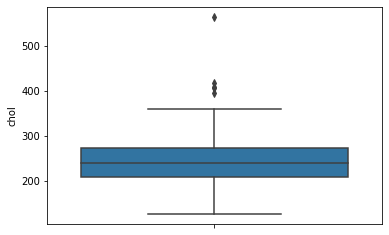

In [347]:
sns.boxplot(y= data['chol'])

## Removing big outliers

In [560]:
data[data['chol']> 400]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf


In [561]:
data.drop(data[data['chol']> 400].index, inplace=True)
data[data['chol']> 400]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf


<AxesSubplot:ylabel='chol'>

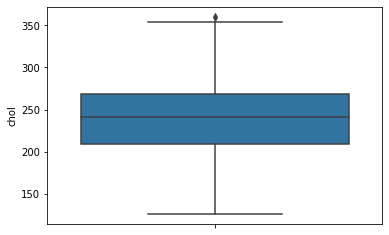

In [562]:
sns.boxplot(y=data['chol'])

## Replacing missing values to mean

In [565]:
data['chol'].mean().round()

241.0

In [616]:
data['chol'] = data['chol'].fillna(data['chol'].mean().round())

In [567]:
data.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
thal        0
nar         0
hc          0
sk          0
trf         0
dtype: int64

## No more missing values

<AxesSubplot:ylabel='age'>

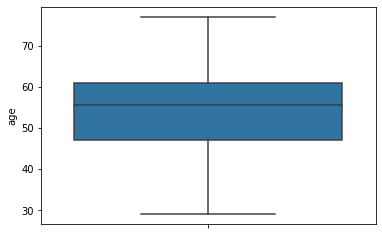

In [354]:
sns.boxplot(y=data['age'])

## Removing big outlier in trestbps

<AxesSubplot:ylabel='trestbps'>

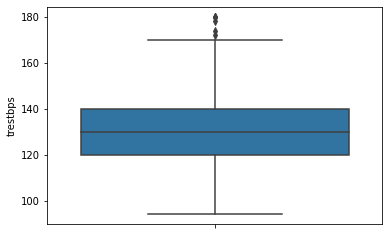

In [568]:
sns.boxplot(y=data['trestbps'])

In [569]:
data[data['trestbps']> 180]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf


In [570]:
data.drop(data[data['trestbps']> 180].index, inplace=True)
data[data['trestbps']> 180]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf


<AxesSubplot:ylabel='trestbps'>

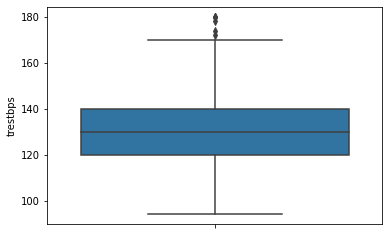

In [571]:
sns.boxplot(y=data['trestbps'])

<AxesSubplot:ylabel='thalach'>

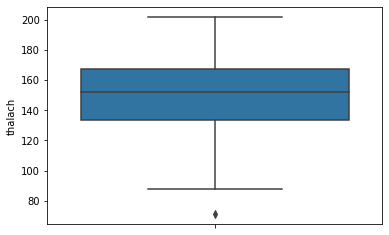

In [359]:
sns.boxplot(y=data['thalach'])

In [360]:
data[data['thalach']< 100]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
34,57,0,152,274.000000,0,1,88,1,1.2,1,3,2,0,0,6876.094262
62,62,1,130,263.000000,0,1,97,0,1.2,1,3,0,0,0,816.563826
80,60,1,120,178.000000,1,1,96,0,0.0,0,2,2,1,0,5837.747754
82,53,0,123,242.093284,0,1,95,1,2.0,2,3,2,2,0,5453.325899
109,64,0,120,246.000000,0,0,96,1,2.2,1,2,2,0,0,3523.936118
171,67,0,120,237.000000,0,1,71,0,1.0,0,2,2,1,2,6531.542587
174,59,0,164,176.000000,1,0,90,0,1.0,2,1,2,0,0,5377.998222
205,62,0,120,267.000000,0,1,99,1,1.8,2,3,2,1,2,6848.362946


<AxesSubplot:ylabel='oldpeak'>

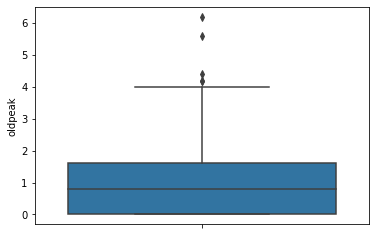

In [361]:
sns.boxplot(y=data['oldpeak'])

## Removing big outlier from oldpeak

In [362]:
data.drop(data[data['oldpeak']>4].index, inplace=True)
data[data['oldpeak']>4]

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf


<AxesSubplot:ylabel='oldpeak'>

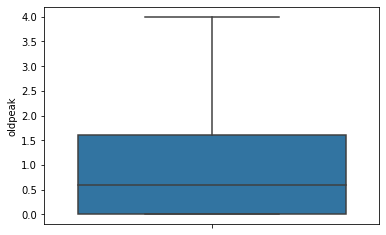

In [363]:
sns.boxplot(y=data['oldpeak'])

<AxesSubplot:ylabel='trf'>

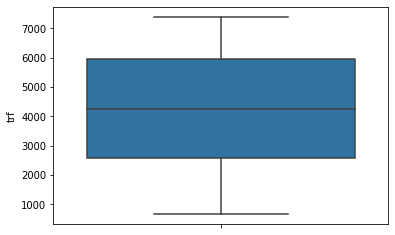

In [364]:
sns.boxplot(y=data['trf'])

<AxesSubplot:>

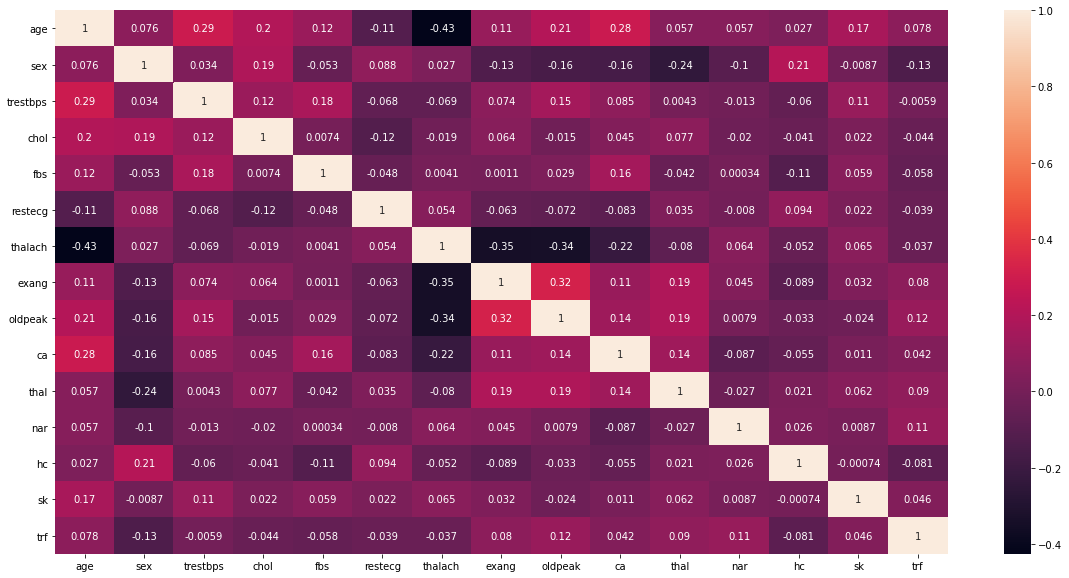

In [365]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

c:\users\aheng\anaconda3\envs\portaltelemedicina\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x720 with 0 Axes>

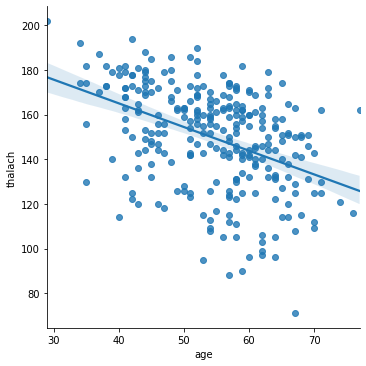

In [366]:
plt.figure(figsize=(20,10))
sns.lmplot('age', 'thalach', data=data)

## it seems that the older you are, perhaps the smaller is maximum heart rate achieved

## Lets divide our data into features and target.

In [584]:
X = data.drop('sex', axis=1)
y = data['sex']

## List of Methods

## We will Benchmark some models: Decision Tree, SVC, Gaussian Naive Bayes, KNN, Random Forest, Multi Layer Perceptron(Artificial Neural Network), Adaboost & GradientBoost.

In [368]:
methods = [DecisionTreeClassifier(criterion='entropy', random_state=0), SVC(), GaussianNB(), KNeighborsClassifier(), 
           RandomForestClassifier(criterion='entropy', random_state=0), MLPClassifier(hidden_layer_sizes=(100,), 
                                                                                      max_iter=2000),
           AdaBoostClassifier(n_estimators=100, random_state=0),GradientBoostingClassifier(n_estimators=100)]

## The first test is in imbalanced data.

## Cross-validation with 5 folds, benchmarking all methods.

In [369]:
Cross_Validation = {}
for method in methods:
    model = method
    Cross_Validation[str(model)] = cross_val_score(model, X, y, cv=5).mean()
Cross_Validation

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.6402597402597403,
 'SVC()': 0.6906493506493506,
 'GaussianNB()': 0.7302597402597402,
 'KNeighborsClassifier()': 0.6115584415584415,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.7123376623376624,
 'MLPClassifier(max_iter=2000)': 0.6181818181818182,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.6870779220779221,
 'GradientBoostingClassifier()': 0.7159090909090909}

## Naive Bayes Metrics:

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
modeltest = GaussianNB()
modeltest.fit(X_train, y_train)
predict = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")
print(classification_report(y_test, predict))

Training data score:  0.7828054298642534
Test data score:  0.7142857142857143
Full data score:  0.7689530685920578 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        40
           1       0.50      0.44      0.47        16

    accuracy                           0.71        56
   macro avg       0.64      0.63      0.64        56
weighted avg       0.70      0.71      0.71        56



<AxesSubplot:>

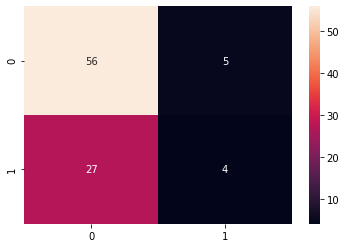

In [552]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True)

## Scaling data to better acceptation of models

In [586]:
SS = StandardScaler()
X = SS.fit_transform(X)

In [582]:
Cross_Validation2 = {}
for method in methods:
    model = method
    Cross_Validation2[str(model)] = cross_val_score(model, X, y, cv=5).mean()
Cross_Validation2

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.6173376623376623,
 'SVC()': 0.704025974025974,
 'GaussianNB()': 0.721948051948052,
 'KNeighborsClassifier()': 0.6643506493506494,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.7149350649350649,
 'MLPClassifier(max_iter=2000)': 0.6896103896103896,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.6755194805194805,
 'GradientBoostingClassifier()': 0.7043506493506493}

## Naive Bayes, Scaled Data, Metrics:

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
modeltest = GaussianNB()
modeltest.fit(X_train, y_train)
predict = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")
print(classification_report(y_test, predict))

Training data score:  0.7737556561085973
Test data score:  0.7142857142857143
Full data score:  0.7617328519855595 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        40
           1       0.50      0.44      0.47        16

    accuracy                           0.71        56
   macro avg       0.64      0.63      0.64        56
weighted avg       0.70      0.71      0.71        56



<AxesSubplot:>

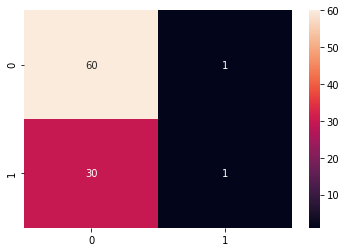

In [374]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True)

c:\users\aheng\anaconda3\envs\portaltelemedicina\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

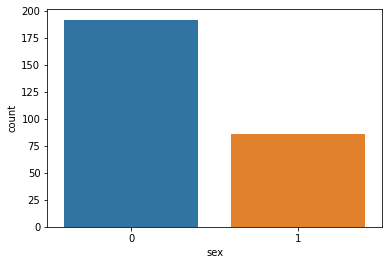

In [375]:
sns.countplot(data['sex'])

## Now lets balance data in 2 samples, undersampling and oversampling.

In [376]:
data['sex'].value_counts()

0    192
1     86
Name: sex, dtype: int64

## Undersampling 0(F) Values to match 1(M)

1    86
0    86
Name: sex, dtype: int64


c:\users\aheng\anaconda3\envs\portaltelemedicina\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

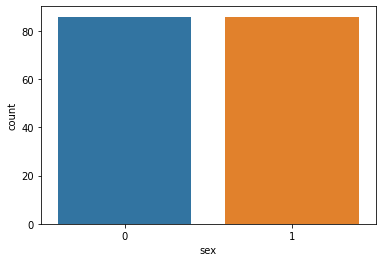

In [377]:
countF, countM = data['sex'].value_counts()
classF = data[data['sex'] == 0]
classM = data[data['sex'] == 1]

classF_undersampling = classF.sample(countM)
data_test_under = pd.concat([classF_undersampling, classM], axis=0)
print(data_test_under['sex'].value_counts())
sns.countplot('sex', data=data_test_under)

## Test using Undersampling 0(F) to 1(M).

In [378]:
X1 = data_test_under.drop('sex', axis=1)
y1 = data_test_under['sex']

## Cross-validation again, benchmarking all methods.

In [379]:
Cross_Validation = {}
for method in methods:
    model = method
    Cross_Validation[str(model)] = cross_val_score(model, X1, y1, cv=5).mean()
Cross_Validation

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.6045378151260504,
 'SVC()': 0.5233613445378151,
 'GaussianNB()': 0.6388235294117648,
 'KNeighborsClassifier()': 0.5228571428571428,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.6398319327731092,
 'MLPClassifier(max_iter=2000)': 0.49445378151260505,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.64,
 'GradientBoostingClassifier()': 0.6398319327731092}

## RandomForest, Undersample Metrics:

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
modeltest = RandomForestClassifier(criterion='entropy', random_state=0)
modeltest.fit(X_train, y_train)
predict = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")
print(classification_report(y_test, predict))

Training data score:  1.0
Test data score:  0.7428571428571429
Full data score:  0.8772563176895307 

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.65      0.79      0.71        14

    accuracy                           0.74        35
   macro avg       0.74      0.75      0.74        35
weighted avg       0.76      0.74      0.75        35



## Lets Scale the data.

In [381]:
SS = StandardScaler()
X1 = SS.fit_transform(X1)
Cross_Validation2 = {}
for method in methods:
    model = method
    Cross_Validation2[str(model)] = cross_val_score(model, X1, y1, cv=5).mean()
Cross_Validation2

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.6045378151260504,
 'SVC()': 0.6278991596638656,
 'GaussianNB()': 0.6329411764705883,
 'KNeighborsClassifier()': 0.6563025210084035,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.6398319327731092,
 'MLPClassifier(max_iter=2000)': 0.5813445378151261,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.6341176470588236,
 'GradientBoostingClassifier()': 0.6573109243697479}

## Some models improved, but not all, lets do more tests. Now with oversampling

## Oversampling 1(M) Values to match 1(F) - we have to be careful in using this method, it can cause overfitting.

1    192
0    192
Name: sex, dtype: int64


c:\users\aheng\anaconda3\envs\portaltelemedicina\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

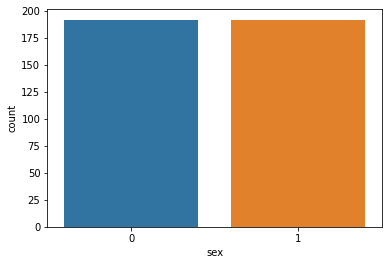

In [382]:
classM_oversampling = classM.sample(countF, replace=True)
data_test_over = pd.concat([classF, classM_oversampling], axis=0)
print(data_test_over['sex'].value_counts())
sns.countplot('sex', data=data_test_over)

## Splitting data in features and target again.

In [383]:
data_test_over['chol'] = data_test_over['chol'].fillna(data_test_over['chol'].mean())
X2 = data_test_over.drop('sex', axis=1)
y2 = data_test_over['sex']

## Cross-validation.

In [384]:
Cross_Validation_over = {}
for method in methods:
    model = method
    model.fit(X2,y2)
    Cross_Validation_over[str(model)] = cross_val_score(model, X2, y2, cv=5).mean()
Cross_Validation_over

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.8256322624743678,
 'SVC()': 0.5208817498291183,
 'GaussianNB()': 0.6768967874231031,
 'KNeighborsClassifier()': 0.6042036910457963,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.8698564593301435,
 'MLPClassifier(max_iter=2000)': 0.549419002050581,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.7942925495557075,
 'GradientBoostingClassifier()': 0.8542378673957621}

## RandomForest, Oversample Metrics:

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
modeltest = RandomForestClassifier(criterion='entropy', random_state=0)
modeltest.fit(X_train, y_train)
predict = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")
print(classification_report(y_test, predict))

Training data score:  1.0
Test data score:  0.8701298701298701
Full data score:  0.9494584837545126 

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.82      0.95      0.88        38

    accuracy                           0.87        77
   macro avg       0.88      0.87      0.87        77
weighted avg       0.88      0.87      0.87        77



<AxesSubplot:>

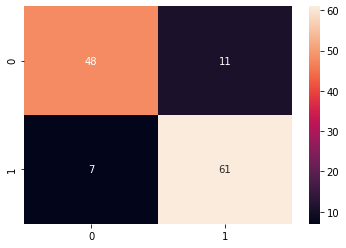

In [387]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, )

## Scaling data of oversampling

In [388]:
X2 = SS.fit_transform(X2)

## Testing Again

In [389]:
Cross_Validation_over = {}
for method in methods:
    model = method
    model.fit(X2,y2)
    Cross_Validation_over[str(model)] = cross_val_score(model, X2, y2, cv=5).mean()
Cross_Validation_over

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.8256322624743678,
 'SVC()': 0.7917293233082707,
 'GaussianNB()': 0.6532467532467532,
 'KNeighborsClassifier()': 0.7004101161995899,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.8646616541353384,
 'MLPClassifier(max_iter=2000)': 0.8514695830485304,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.791695146958305,
 'GradientBoostingClassifier()': 0.8516746411483254}

## Cross-validate prediction

In [390]:
prediction3 = cross_val_predict(RandomForestClassifier(criterion='entropy', random_state=0), X2, y2, cv=5)
print(classification_report(y2 ,prediction3))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       192
           1       0.83      0.92      0.87       192

    accuracy                           0.86       384
   macro avg       0.87      0.86      0.86       384
weighted avg       0.87      0.86      0.86       384



## Oversample, Scaled data Metrics:

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
modeltest = RandomForestClassifier(criterion='entropy', random_state=0)
modeltest.fit(X_train, y_train)
predict2 = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")
print(classification_report(y_test, predict2))

Training data score:  1.0
Test data score:  0.8701298701298701
Full data score:  0.9494584837545126 

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.82      0.95      0.88        38

    accuracy                           0.87        77
   macro avg       0.88      0.87      0.87        77
weighted avg       0.88      0.87      0.87        77



<AxesSubplot:>

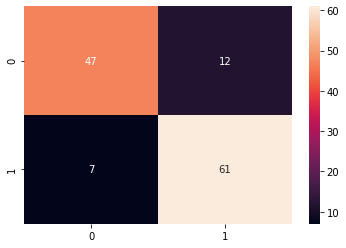

In [392]:
sns.heatmap(confusion_matrix(y_test ,predict2), annot=True)

## The better results we have is  Oversampling without scalling with > 0.85 accuracy, But it is dangerous to use this method as it can overfitting in  new data 

## Lets see that dividing the original dataset by half.

1    98
0    98
Name: sex, dtype: int64


c:\users\aheng\anaconda3\envs\portaltelemedicina\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

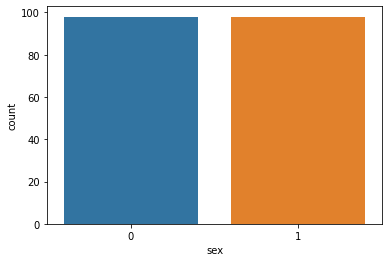

In [607]:
X_ = data.sample(140, replace=True)
X_['sex'].value_counts()
## Dataset now have only 140 rows

countF, countM = X_['sex'].value_counts()
classF = X_[X_['sex'] == 0]
classM = X_[X_['sex'] == 1]
#Oversampling again.
classM_oversampling = classM.sample(countF, replace=True)
data_test_over = pd.concat([classF, classM_oversampling], axis=0)
print(data_test_over['sex'].value_counts())
sns.countplot('sex', data=data_test_over)


## All tests again

In [608]:
y_ = X_['sex']
X_ = X_.drop('sex', axis=1)

In [395]:
Cross_Validation_over = {}
for method in methods:
    model = method
    model.fit(X_,y_)
    Cross_Validation_over[str(model)] = cross_val_score(model, X_, y_, cv=5).mean()
Cross_Validation_over

{"DecisionTreeClassifier(criterion='entropy', random_state=0)": 0.7214285714285714,
 'SVC()': 0.6857142857142857,
 'GaussianNB()': 0.7071428571428571,
 'KNeighborsClassifier()': 0.6214285714285714,
 "RandomForestClassifier(criterion='entropy', random_state=0)": 0.8,
 'MLPClassifier(max_iter=2000)': 0.6714285714285714,
 'AdaBoostClassifier(n_estimators=100, random_state=0)': 0.7928571428571429,
 'GradientBoostingClassifier()': 0.7571428571428571}

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=1)
modeltest = RandomForestClassifier(criterion='entropy', random_state=0)
modeltest.fit(X_train, y_train)
predict = modeltest.predict(X_test)
print("Training data score: ",modeltest.score(X_train, y_train))
print("Test data score: ",modeltest.score(X_test, y_test))
print("Full data score: ",modeltest.score(X, y), "\n")

Training data score:  1.0
Test data score:  0.8571428571428571
Full data score:  0.6931407942238267 



## As we can see, the score of the full data has dropped a lot. due to having new data in it

## Testing GridSearchCV - hyperparameter tuning for random forest

In [398]:
from sklearn.model_selection import GridSearchCV
# Creating parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion' : ['entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [399]:
grid_search.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

## Looking at the best parameters.

In [400]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [401]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_depth=90, max_features=3,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200)

## Evaluating random forest with best parameters.

score:  [0.67857143 0.73214286 0.66071429 0.76363636 0.70909091] 

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       192
           1       0.58      0.35      0.43        86

    accuracy                           0.72       278
   macro avg       0.66      0.62      0.62       278
weighted avg       0.70      0.72      0.70       278



<AxesSubplot:>

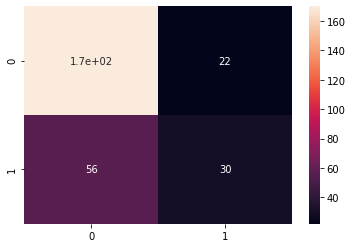

In [406]:
firstpredict = cross_val_predict(best_grid, X, y, cv=5)
print("score: " , cross_val_score(best_grid, X, y, cv=5), "\n")
print(classification_report(y, firstpredict))
sns.heatmap(confusion_matrix(y, firstpredict), annot=True)

## Gaussian Naive Bayes still the better classificator.

# ---------------------------------------------------------------------------------------------------------------

## Final Explanation: the model choosed is Gaussian Naive Bayes due to better results in test data, the model uses a table of probabilities to generate the result

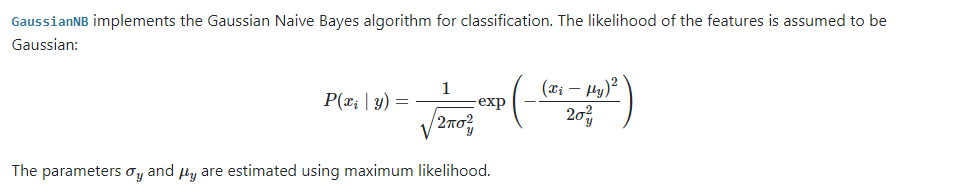

score:  [0.73214286 0.73214286 0.71428571 0.76363636 0.70909091] 

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       192
           1       0.60      0.40      0.48        86

    accuracy                           0.73       278
   macro avg       0.68      0.64      0.65       278
weighted avg       0.71      0.73      0.71       278



<AxesSubplot:>

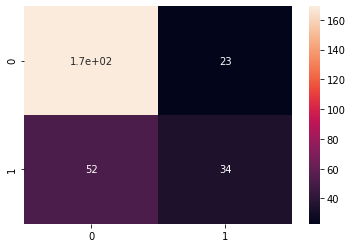

In [397]:
X = data.drop('sex', axis=1)
y = data['sex']
firstpredict = cross_val_predict(GaussianNB(), X, y, cv=5)
print("score: " , cross_val_score(GaussianNB(), X, y, cv=5), "\n")
print(classification_report(y, firstpredict))
sns.heatmap(confusion_matrix(y, firstpredict), annot=True)